In [2]:
from obspy import read

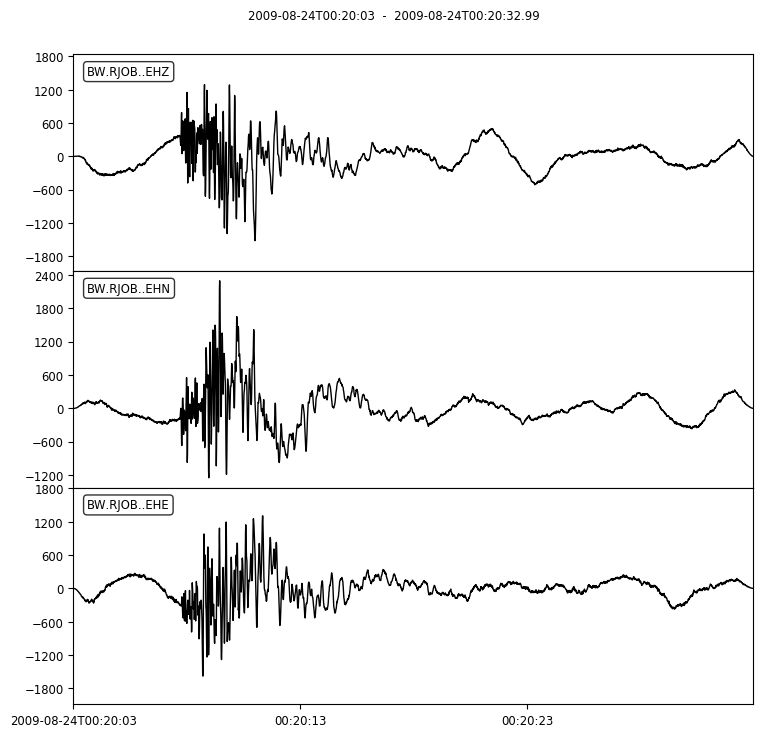

In [3]:
read().plot();